## Importing essential libraries

In [1]:
from keras.models import load_model
from rembg import remove, new_session
from PIL import Image
import numpy as np
import io
import datetime
import cv2




%matplotlib inline 
from matplotlib import pyplot as plt 
import pylab 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) 


c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## Loading Test Images

In [7]:
# img_path = "./1.4_test_input/images/priyanka_chopra.jpg"
# img_path = "./1.4_test_input/images/kartik_aryan.jpg"
inputPath = "./test_images/upload2023-06-26_15-15-00.png"
outputPath = "./output.png"

In [8]:
from IPython.display import display
from PIL import Image
from io import BytesIO


session = new_session("u2net_human_seg")

def process(session, image, *, size=None, bgcolor='white'):
    "session is a rembg Session, and image is a PIL Image"
    if size is not None:
        image = image.resize(size)
    else:
        size = image.size
    result = Image.new("RGB", size, bgcolor)
    out = remove(image, session=session)
    result.paste(out, mask=out)
    return result

with Image.open(inputPath) as imgage:
    out = process(session, imgage, size=(600, 600), bgcolor='#FFFFFF')
    out.save('output.png')

# pil_img = Image(filename=img_path)
# display(pil_img)

# now = datetime.datetime.now()
# timestamp_str = now.strftime("%Y-%m-%d_%H-%M-%S")
# imageName ="upload"+timestamp_str+".png"
# print(timestamp_str)

#     # Save the uploaded image file to a temporary location
# temp_path = 'tmp/'+imageName # You can change the path and file name as needed
# image_file.save(temp_path)
    
    # Load the image from the temporary file
# image = Image.open(img_path)
# image2 = Image.open(img_path2)

#     # Process the image to remove the background
# processed_image = remove(image)

#     # Create a BytesIO object to save the processed image
# output_buffer = io.BytesIO()
# processed_image.save(output_buffer, format='PNG')
# output_buffer.seek(0)
# with open('output_image.png', 'wb') as file:
#     file.write(output_buffer.getvalue())
# display(image2)


## Results on Age/Gender/Emotion

 shape0 600 shape1 600
Distance from the top of the image to the top of the vertical line: 189 pixels
Percentage of vertical line height from the whole image height: 27.17%


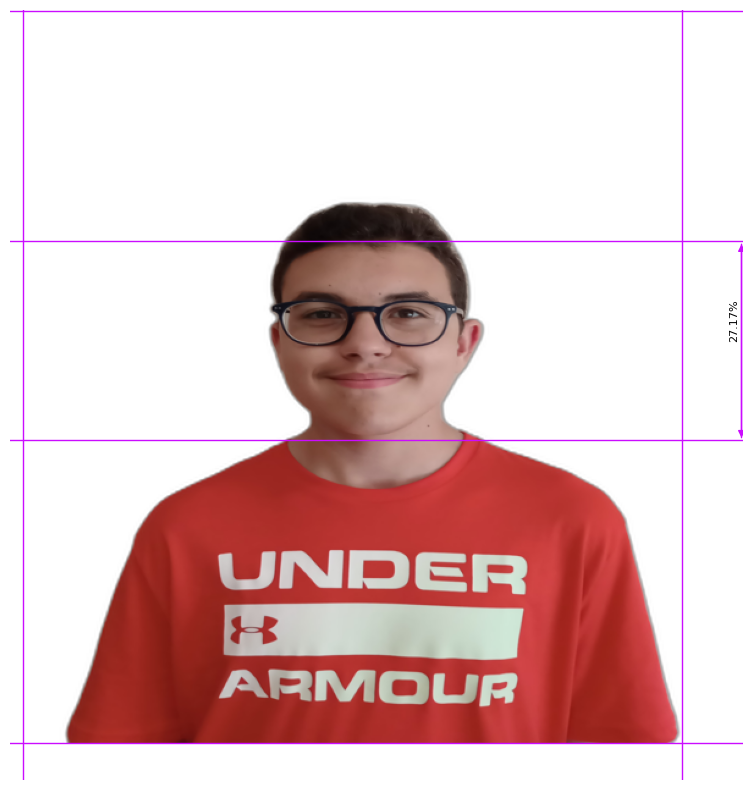

In [9]:
from matplotlib.patches import FancyArrowPatch
img_path = outputPath

test_image = cv2.imread(img_path)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('./cv2_cascade_classifier/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

height = str(test_image.shape[0]) 
width = str(test_image.shape[1])

print(' shape0 ' + height+' shape1 '+width )


line_thickness = 1
arrowhead_size = 10

if len(faces) == 0:
  print('face not detected')
else:
  for (x,y,w,h) in faces:
   fig, ax = plt.subplots(figsize=(10, 10))
   ax.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
   ax.axis('off')  
   top_line_y = y
   bottom_line_y = y + h 
  
   print(f"Distance from the top of the image to the top of the vertical line: {top_line_y} pixels")
   
   

   ax.axhline(top_line_y, color=(203/255, 12/255, 255/255), linewidth=line_thickness)
   ax.axhline(bottom_line_y, color=(203/255, 12/255, 255/255), linewidth=line_thickness)

   ax.axhline(test_image.shape[0]*0, color=(203/255, 12/255, 255/255), linewidth=line_thickness)
   ax.axhline(test_image.shape[0], color=(203/255, 12/255, 255/255), linewidth=line_thickness)

   mid_point_y = (top_line_y + bottom_line_y) // 2

   vertical_line_x = test_image.shape[1] -1.5


   ax.axvline(test_image.shape[1]-50, color=(203/255, 12/255, 255/255), linewidth=line_thickness)
   ax.axvline(10, color=(203/255, 12/255, 255/255), linewidth=line_thickness)

   arrow1 = FancyArrowPatch((vertical_line_x, top_line_y), (vertical_line_x, bottom_line_y),
                            color=(203/255, 12/255, 255/255), linewidth=line_thickness,
                            arrowstyle='-|>', mutation_scale=arrowhead_size, zorder=5)
   arrow2 = FancyArrowPatch((vertical_line_x, bottom_line_y), (vertical_line_x, top_line_y),
                            color=(203/255, 12/255, 255/255), linewidth=line_thickness,
                            arrowstyle='-|>', mutation_scale=arrowhead_size, zorder=5)
  
   vertical_line_height_percentage = (h / test_image.shape[0]) * 100
   print(f"Percentage of vertical line height from the whole image height: {vertical_line_height_percentage:.2f}%")
   ax.text(vertical_line_x - 10, mid_point_y, f"{vertical_line_height_percentage:.2f}%", color=(0, 0, 0), fontsize=8,rotation=90)
   ax.add_patch(arrow1)
   ax.add_patch(arrow2)
   plt.show()


